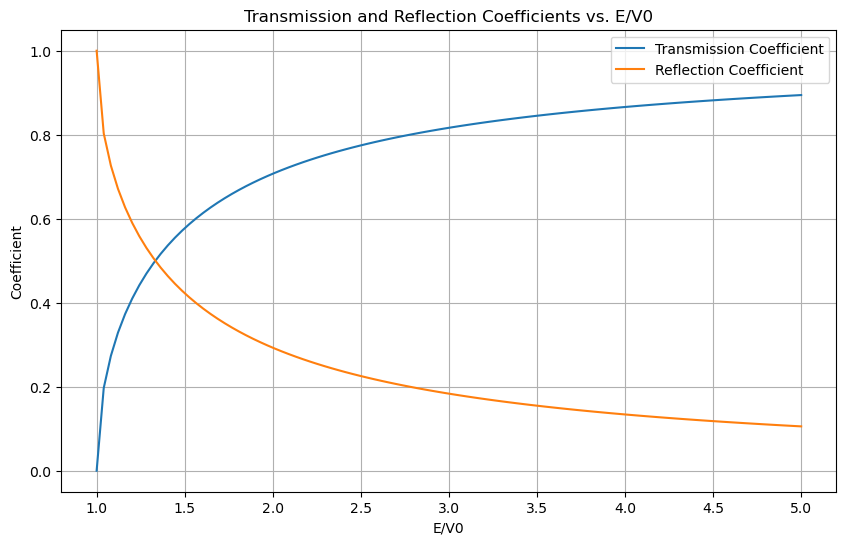

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Define constants
m = 9.10938356e-31  # electron mass in kg
h_bar = 1.0545718e-34  # Planck's constant / (2 * pi)

# Function to calculate k1 and k2
def calculate_k_values(E, V0):
    k1 = np.sqrt(2 * m * E) / h_bar
    k2 = np.sqrt(2 * m * (E - V0)) / h_bar
    return k1, k2

# Function to calculate transmission coefficient T
def calculate_transmission_coefficient(k1, k2):
    return k2 / k1

# Function to calculate reflection coefficient R
def calculate_reflection_coefficient(B, A):
    return np.abs(B / A) ** 2

# Define range of E/V0
E_over_V0 = np.linspace(1, 5, 100)  # Adjust range as needed

# Define potential barrier height
V0 = 1  # example value

# Calculate k values, transmission coefficient, and reflection coefficient
k1, k2 = calculate_k_values(E_over_V0 * V0, V0)
T = calculate_transmission_coefficient(k1, k2)
R = 1 - T  # Since T + R = 1

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(E_over_V0, T, label='Transmission Coefficient')
plt.plot(E_over_V0, R, label='Reflection Coefficient')
plt.xlabel('E/V0')
plt.ylabel('Coefficient')
plt.title('Transmission and Reflection Coefficients vs. E/V0')
plt.legend()
plt.grid(True)
plt.show()

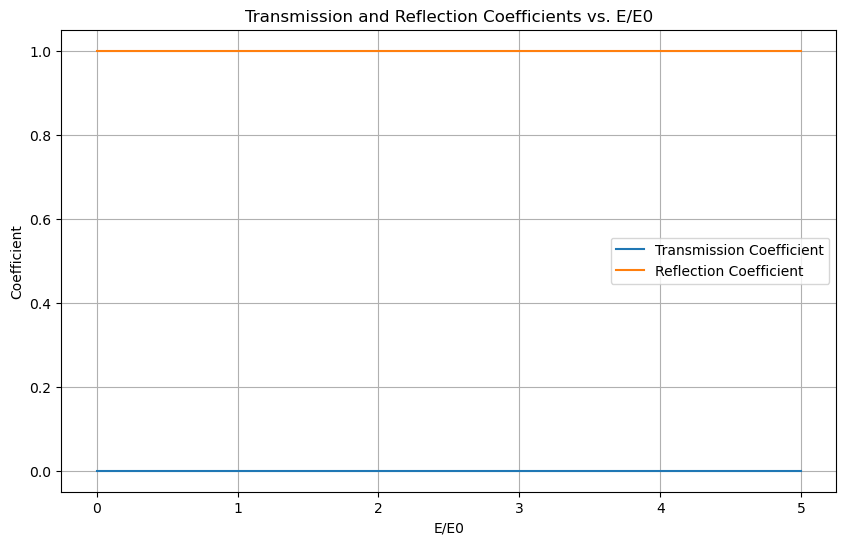

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Define range of E/E0
E_over_E0 = np.linspace(0, 5, 100)  # Adjust range as needed

# Define transmission coefficient T and reflection coefficient R
T = np.full_like(E_over_E0, 0)  # T = 4 for all E/E0
R = np.full_like(E_over_E0, 1)   # R = 1 for all E/E0

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(E_over_E0, T, label='Transmission Coefficient')
plt.plot(E_over_E0, R, label='Reflection Coefficient')
plt.xlabel('E/E0')
plt.ylabel('Coefficient')
plt.title('Transmission and Reflection Coefficients vs. E/E0')
plt.legend()
plt.grid(True)
plt.show()


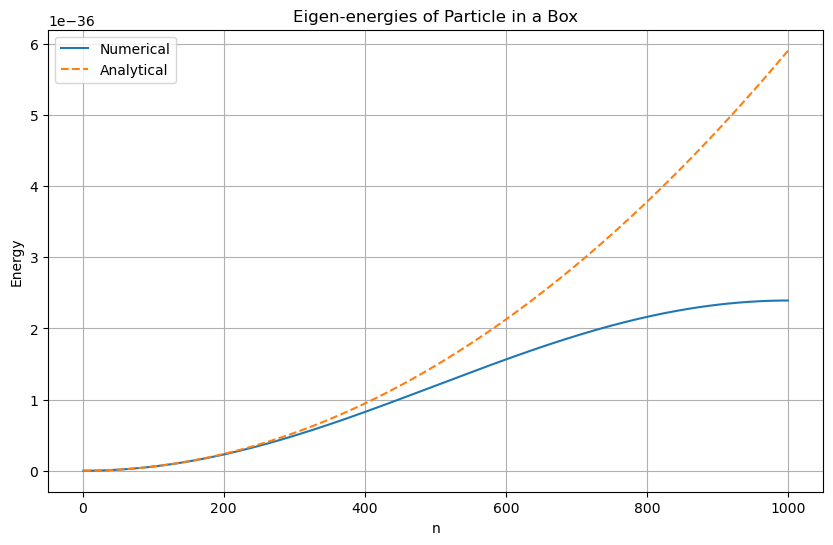

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define constants
h_bar = 1.0545718e-34  
m = 9.10938356e-31      
L = 101    # Total length of the box (101 Å)
N = 1000    # Number of points in the discrete lattice
dx = L / (N)  # Grid spacing

# Define potential function (infinite potential walls)
def V(x):
    return np.zeros_like(x)  # Infinite potential walls

# Define kinetic energy operator matrix
def T_matrix(N, dx):
    T = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            if i == j:
                T[i, j] = -2 / (dx ** 2)
            elif np.abs(i - j) == 1:
                T[i, j] = 1 / (dx ** 2)
    return (-h_bar ** 2 / (2 * m)) * T

# Solve eigenvalue problem
H = T_matrix(N, dx) + np.diag(V(np.arange(0, L, dx)))
energies, wavefunctions = np.linalg.eigh(H)

# Analytical solution for comparison
def E_analytical(n, L):
    return (h_bar ** 2 * np.pi ** 2) / (2 * m * L ** 2) * n ** 2

# Plotting eigen-energies
n_values = np.arange(1, N + 1)
plt.figure(figsize=(10, 6))
plt.plot(n_values, energies[:N], label='Numerical')
plt.plot(n_values, E_analytical(n_values, L), label='Analytical', linestyle='--')
plt.xlabel('n')
plt.ylabel('Energy')
plt.title('Eigen-energies of Particle in a Box')
plt.legend()
plt.grid(True)
plt.show()


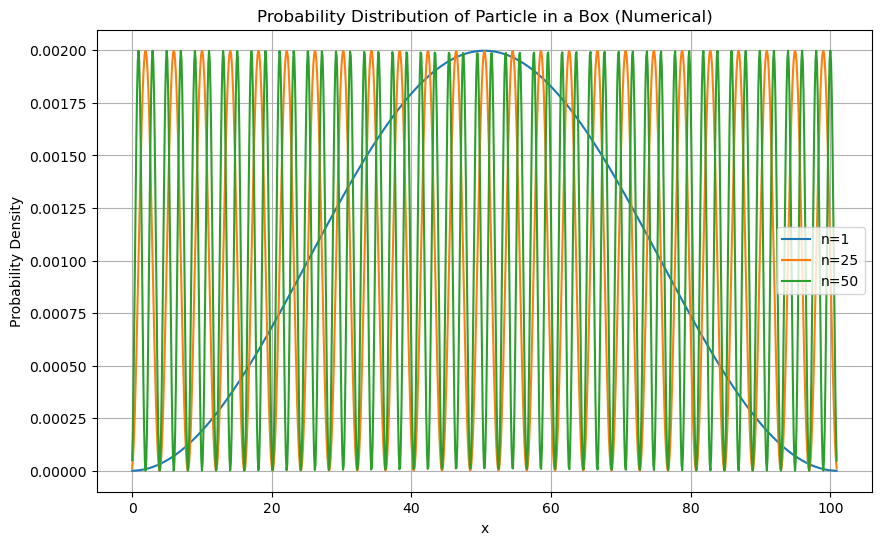

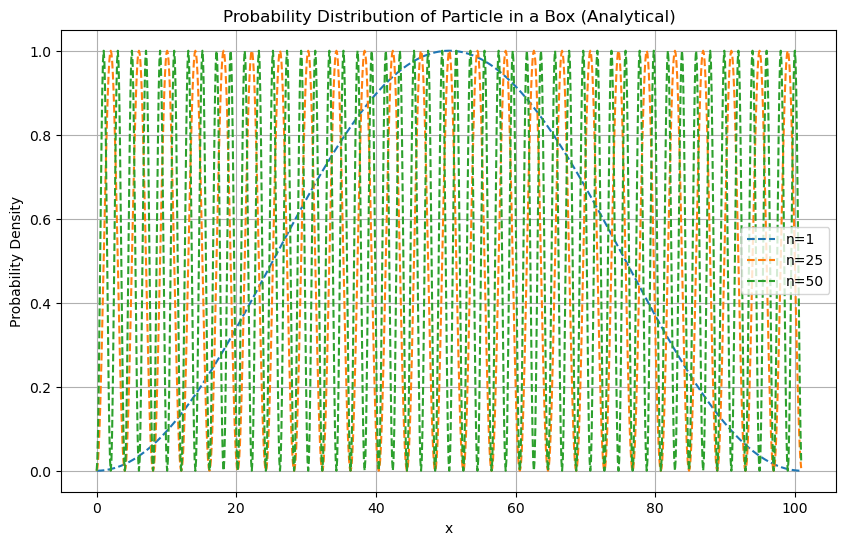

In [66]:
# Plotting eigenfunctions for n=1, 25, 50
plt.figure(figsize=(10, 6))
for n in [1, 25, 50]:
    plt.plot(np.arange(0, L, dx), wavefunctions[:, n-1]**2, label=f'n={n}')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Probability Distribution of Particle in a Box (Numerical)')
plt.legend()
plt.grid(True)
plt.show()
plt.figure(figsize=(10, 6))  
for n in [1, 25, 50]:
     plt.plot(np.arange(0, L, dx), np.sin(n * np.pi * np.arange(0, L, dx) / L)**2, label=f'n={n}', linestyle='--')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Probability Distribution of Particle in a Box (Analytical)')
plt.legend()
plt.grid(True)
plt.show()
